# ViTのまとめ

ViTの全容は次の通り。MHSAなどは雑なまとめ。

![](./images/ViT.png)

### （ディープラーニングを実装する上での）テンソル（行列）の基礎

**テンソルや行列についてご承知の方は飛ばしていただいて構わない。**

最初に、テンソルについて紹介する。テンソルとはいわゆる行列を拡張した概念である。
行列とは、縦横に並んだ数の集まりである。横の並びを**行**といい、縦の並びを**列**と言う。

$
\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{pmatrix}
\quad
\begin{pmatrix}
1\\
4\\
7
\end{pmatrix}
\quad
\begin{pmatrix}
1 & 2 & 3\\
\end{pmatrix}
$

特に2つめや3つめのように、列か行が1つのときは **ベクトル**という。
2つめのように列が1つのベクトルを**列ベクトル**、3つめのように行が1つのベクトルを**行ベクトル**という。

行列は$A$や$W$のような大文字が、ベクトルは$a$や$x$のような小文字で表されることが多い。


少し見方を変えてみる。さきほどの説明では数が並んだものを行列、行数か列数が1のときをベクトルと呼んだ。
これを逆に、数が1行もしくは1列のものをベクトルと呼び、それらを縦もしくは横に並んだものを行列と考えることにする。
今度は縦横に並んだ同じ大きさの行列を **重ねてみる**。ちょうど、線を並べたら平面、面を並べたら立体ができるようなイメージである。
このように行列を重ねてできたものが **テンソル** である。

正確にはこの段階のテンソルを **3階のテンソル**と呼ぶ。この3階のテンソルをさらに重ねたら5階のテンソル、更に……と続く。
ちなみに1階のテンソルはベクトル、2階のテンソルは行列のことを指す。

プログラミングで考えると、配列構造の多重化で表現できる。


In [12]:
vector = [1, 2, 3]

matrix = [
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
]

tensor = [
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ],
    [
        [19, 20, 21],
        [22, 23, 24],
        [25, 26, 27],

    ]
]

次元が$D$のベクトル全体の集合を$\mathbb{R}^D$と表す。$\mathbb{R}$とは数学で「実数全体の集合」を表している。
これがD個並んでいるベクトル、という意味である。

行列は$\mathbb{R}^{N \times D}$のように表す。これは行数が$N$で列数が$D$の行列全体の集合である。
$A \in \mathbb{R}^{N \times D}$と表記された場合は、$A$がN行D列の行列であることを表す。
$N$か$D$が1のときはベクトルを表す。ベクトルが行列の特別な場合、というのが見て取れる。

テンソルは$\mathbb{R}^{C \times H \times W}$のように表す。H行W列の行列がC個重なっているようなイメージである。

$C$が1のときはH行W列の行列全体を表す。行列がテンソルの特別な場合であることが見て取れる。

$C$が1で、更に$H$か$W$のいずれかが1のときは、$H$次元もしくは$W$次元ベクトル全体の集合を表す。ベクトルもテンソルの特別な場合である。


ViTに限らずディープラーニングでは、頻繁にあるテンソル$X$（行列・ベクトル）からそれとは別の形のテンソル（行列・ベクトル）$Y$に変換することがある。
これは、**$X$にとあるテンソル$W$をかけている処理に過ぎない**。

行列のかけ算は厳密に説明するとややこしいため、あくまでも「形」だけでみる。
$X \in \mathbb{R}^{2 \times 3}$という行列があったときに、これに$W \in \mathbb{R}^{3 \times 5}$という行列をかけることを考える。
行列のかけ算は少し特殊で、$X \times W$ を考えたときに、左側の$X$の列数と$W$の行数が一致しているときにのみ計算できて、行数が$X$の行数で列数が$W$の列数の行列ができる。今回の場合は、$X$ が$ \mathbb{R}^{2 \times 3}$ で $W$ が $\mathbb{R}^{3 \times 5}$のため、$X$の列数と$W$の行数は5で一致している。そのため、$X \times W$は計算できてでき上がる行列は$ \mathbb{R}^{2 \times 5}$の行列となる。$W \times X$が計算できないことは、行数と列数をみれば確認できる。

ベクトルに行列をかければ、別の次元のベクトルに変換もできる。

上で見た通り、ベクトルも行列もテンソルの特別な場合であった。つまり「とあるテンソルを別の「形」のテンソルに変換するときには、なんらかのテンソルをかける」という処理をしているにすぎない。かけるための「なんらかのテンソル」は具体的にはディープラーニングの手法によって定まるものであったり、もしくは既知のものであればPyTorchなどのライブラリですでに用意されている。そのため、開発者側ではあくまでも「形」がどのように変化するかさえ抑えておけば良い。（もちろん、新たなディープラーニングの手法を開発する場合はその限りではない）

まとめると、

- データはベクトルや行列、テンソルで表現される。ベクトルも行列も、テンソルの特別な場合である
- データに**計算できる形の**テンソルをかけることで、目的に近づけていく
- ディープラーニングを学ぶ上で、テンソルの形を理解することのみが重要


である。

ViTの解説中には「線形層」という言葉が出てくるが、これはおおよそ「テンソルをかけている」と解釈すればよい。





## 解説

数式表現をここでざっとまとめる。使う記号を先にまとめる。

$
\begin{aligned}
H &: 画像の高さ\\
W &: 画像の幅\\
C &: 画像のチャンネル（RGB）\\
P &: パッチ1つの縦横のサイズ\\
N_p &: パッチの分割数。(= \frac{H}{P} * \frac{W}{P} = \frac{HW}{P^2})\\
D &: 各パッチを埋め込み後のベクトルの次元\\
N &: トークン数。パッチの分割数 + クラストークンの数(1) = N_p + 1
\end{aligned}
$

### Input Layer

![](images/summary/inputlayer.png)

$B_n$枚の画像の中から1枚の画像を例に紹介する。

画像のサイズを$H \times W$でチャンネル数（色）を$C=3$とする。
このとき、$\mathbb{R}^{C \times H \times W}$と表せる。

$\mathbb{R}^{H \times W}$は行数が$H$で列数が$W$の行列である。
$\mathbb{R}^{C \times H \times W}$ は$H \times W$の行列が$C$個重なっているというイメージ(いくつかの行列が重なっているものをテンソルという)。
今の場合は$C$はRGBの3チャンネルなので、RGBそれぞれの行列がある。
Rの行列は行数が$H$で列数が$W$であり、それぞれの要素に0 - 255 の値が入っている。GBも同様。

これを **パッチ** に分割する。分割する大きさは個数は場合によって異なる。
縦横$P$pixelのパッチに分割すると、縦の分割は$\frac{H}{P}$個、横の分割は$\frac{W}{P}$個になる。
つまり、パッチの個数は$\frac{H}{P} \times \frac{W}{P} = \frac{HW}{P^2}$となる。この$\frac{HW}{P^2}$を$N_p$としておく。

分割した各パッチは$\mathbb{R}^{C \times \frac{H}{P} \times \frac{W}{P} }$というテンソルの形になる。これも元の画像の時と同じで、$\frac{H}{P} \times \frac{W}{P}$の大きさの行列が$C=3$つ重なっている状態である。個の行列がパッチの個数分、つまり$N_p$個ある。テンソルで表現すれば$\mathbb{R}^{N_p \times C \times \frac{H}{P} \times \frac{W}{P} }$である。

これらを **Flatten** でベクトルに変換する。$\mathbb{R}^{C \times \frac{H}{P} \times \frac{W}{P} }$ をただの1列の列ベクトルにすると$\mathbb{R}^{\frac{CHW}{P^2} }$
になる。テンソルの成分をただ一列にしたものと思えば良い。この列ベクトルがパッチの個数分、すなわち$N_p$ある。テンソルで表現すれば$\mathbb{R}^{N_p \times C \times \frac{CHW}{P^2} }$である。

これらのパッチに **パッチ埋め込み**を適用する。埋め込みとは学習に使いやすいベクトルの形に変換することである。今回は返還後のベクトルの次元を$D$とすると、$\mathbb{R}^{\frac{CHW}{P^2} }$ から $\mathbb{R}^{D}$ に埋め込む。この段階でもパッチの個数分、すなわち$N_p$個ある。テンソルで表現すれば$\mathbb{R}^{N_p \times D }$である。

次にViTにおいて最終的なアウトプットとなる情報である **クラストークン**を今まで計算したテンソルに追加する。クラストークンの大きさはパッチ埋め込みしたときのベクトルの次元と同じ$\mathbb{R}^D$である。実装的にはパッチ埋め込みした_**テンソルの頭に**_ 追加する。するとパッチの個数にクラストークンを追加した$N_p + 1$個のベクトルができたことになる。$N = N_p + 1$をトークン数と呼ぶ。テンソルの形は$\mathbb{R}^{N \times D}$である。

Input Layerの最後の工程として **位置埋め込み**をする。位置埋め込みはパッチの位置を保持する埋め込みである。というのも、今までの工程で画像をパッチに分割していろいろやったことで数値で表現しているが、それぞれの数値がどこの画像の位置を表しているかの情報を保持していない。それらを保持するためのテンソルを用意して次の工程に教える役目を持つ。

Input Layerはいままでに構成したテンソルと同じ大きさのテンソルを追加する。すなわち、$\mathbb{R}^{N \times D}$のテンソル同士を足し合わせるだけなので、大きさは変わらない。

### Encoder







Encoderの全容は次の通り。

![](images/summary/encoder.png)

処理はEncoderBlockごとに分かれる。EncoderBlockの個数はハイパーパラメータである。

各**EncoderBlock**で行われる処理は同じで、次で解説する。


### EncodeBlock

EncoderBlock の全容は次の通り。

![](images/summary/encoderblock.png)

各項目の詳細な計算方法はそれぞれに紹介するので、ここではおおまかな役割を紹介する。

**Layer Normalization** は各データを**正規化**するための方法。正規化とは、データの性質を損なうことなく扱いやすい形にデータを変換することである。「1、100、1000」というデータがあった場合に、単純に大きさだけを考えたい場合は億をとって「1,100,1000」としても順序は変わらない。といった具合に、データを計算しやすい形に整形すること。

正規化の方法によってはすべてのデータ（今回の場合はバッチ全体）で計算する必要があるものがあるが、Layer NormalizationはInput Layerで埋め込んだ各ベクトルごとに正規化をするため、それ以外のデータを計算する必要がないのが利点。入力は$\mathbb{R}^{N \times D}$で出力も$\mathbb{R}^{N \times D}$であるため、変わらない。


**MHSA(Multi-Head Self Attention)**は**Self Attention**を複数行う処理。Self Attentionとは、Input Layerで生成した各埋め込みベクトルを**良いデータ**にすることである。良いデータとは「特徴がはっきりしている」といった意味合いである。Self Attentionの特徴として、良いデータを生成するときに **他のデータだけでなく対象のデータ自身も比較対象に加えて** データを生成する。A,B,Cを比較するときに、Aを基準としたらたいていの場合は比較対象としてB,Cのみを比較するが、この比較にA自身も比較の対象に加えるのである。当然Aが一番近いことになるが、次に近いのがCだったときにはAの特徴を一番反映した上でCの特徴を加え、Bは少しだけ反映して新しいAをつくる。これがSelf Attentionで、さらにデータを分割してそれぞれのデータ単位でSelf Attentionをし、データを再度つなぎ合わせるのがMHSAである。

MLP(Multi-Layer Perceptron)は、日本語では多層パーセプトロンでいわゆるディープラーニングで使われている多層のニューラルネットワークである。

具体的に見ていく。


#### Layer Normalization

レイヤーの正規化。データ自身の平均と標準偏差を使う。

Batch Normalizationという正規化手法もあるが、正規化するときに使う平均と標準偏差がバッチ全体の物を使うため、データごとにトークン数が異なる場合は使えない。
Layer Normalizationは各データごとの平均と標準偏差を使うため、そういった不都合な点がない。

$a  =  \begin{pmatrix} a_1\\ a_2\\ \vdots\\ a_K  \end{pmatrix}  \in \mathbb{R}^K$ に対して（算術）平均$\mu$と$\sigma$は

$
\begin{aligned}
\mu &= \frac{1}{K} \sum_{i=1}^K a_i\\
\sigma &= \sqrt{\frac{1}{K} \sum_{i=1}^K (a_i - \mu)^2}
\end{aligned}
$

である。

また、$\beta_i, \gamma_i \in \mathbb{R}$ を$a$の$i$番目の要素 $a_i$ に対する学習パラメータとすると、 Layer Normalization $LN(a)_i$ は

$
\displaystyle LN(a)_i = \gamma_i \frac{a_i - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta_i \quad (i = 1, 2, \dots, K)
$

である。ただし $\epsilon$は分母が0となることを防ぐための無限小の数値とする。


具体的に見てみる。数式が見づらい場合はPythonコードを以下に用意しているので、そちらをみてほしい。

画像データをInput Layerに通して生成されたテンソルを
$
x = 
\begin{pmatrix}
[x_{1,1} & x_{1,2} & \dots & x_{1,384}]\\
[x_{2,1} & x_{2,2} & \dots & x_{2,384}]\\
[x_{3,1} & x_{3,2} & \dots & x_{3,384}]\\
[x_{4,1} & x_{4,2} & \dots & x_{4,384}]\\
[x_{5,1} & x_{5,2} & \dots & x_{5,384}]\\
\end{pmatrix}
 \in R^{N \times D}
 $
 ($5$はトークン数（パッチ数+クラストークン）、$384$は各パッチごとにベクトルの長さ)とする。$x$の1列目$p_1=[x_{1,1} \quad x_{1,2} \quad \dots \quad x_{1,384}]$に
 Layer Normalizationを適用することを考える。

より具体的に見るために $p_1 = [1, 2, 1, 2, 1, 2, \dots, 1, 2]$だったとすると、平均と標準偏差は
$$
\begin{aligned}
\mu &= \frac{1}{D} (1 + 2 + 1 + 2 + 1+ 2+ \dots, 1 + 2)\\
    &= 1.5\\
\sigma &= \sqrt{\frac{1}{D} ((1 - 3/2)^2 + (2 - 3/2)^2 + (1 - 3/2)^2 + (2 - 3/2)^2 + (1 - 3/2)^2 + (2 - 3/2)^2  + \dots + (1 - 3/2)^2 + (2 - 3/2)^2 ) }\\
       &\fallingdotseq 0.25
\sigma^2 &= 0.0625
\end{aligned}
$$

であるから、

$$
\begin{aligned}
&[LN(p_1)_1, LN(p_1)_2, \dots LN(p_1)_D] \\
&= 
[
\gamma_1 \frac{1 - \frac{3}{2}}{\sqrt{(0.0625 + \epsilon)}} + \beta_1, 
\gamma_2 \frac{2 - \frac{3}{2}}{\sqrt{(0.0625 + \epsilon)}} + \beta_2, 
\dots, 
\gamma_{383} \frac{1 - \frac{3}{2}}{\sqrt{(0.0625 + \epsilon)}} + \beta_{383},
\gamma_{384} \frac{2 - \frac{3}{2}}{\sqrt{(0.0625 + \epsilon)}} + \beta_{384}
]
\end{aligned}
$$

となる。


In [2]:
import numpy as np

# トークン数
N = 5
# 埋め込みベクトルの次元
D = 384


input_data = [[i%2+1 for i in range(1,D+1)] for _ in range(N)]

# 学習パラメータ
gammas = [[np.random.normal() for _ in range(D)] for _ in range(N)]
betas = [[np.random.normal() for _ in range(D)] for _ in range(N)]

# 分母が0になるための無限小の数
epsilon = 0.00000000001


def ln(data, mu, sigma, i, j):
    return gammas[i][j] * (data - mu)/np.sqrt(sigma**2 + epsilon) + betas[i][j]


# 結果
result = [[0 for _ in range(D)] for _ in range(N)]
for i,x in enumerate(input_data):
    # 平均
    mu = np.mean(x)
    # 標準偏差
    sigma = np.std(x)
    # Layer Normalization
    for j,d in enumerate(x):
        result[i][j] = ln(x, mu, sigma, i, j)

print(result[0])


[array([ 0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.64575544,
        0.62176997, -0.64575544,  0.62176997, -0.64575544,  0.62176997,
       -0.64575544,  0.62176997, -0.64575544,  0.62176997, -0.6

テンソルの形は$\mathbb{R}^{N \times D}$の中の数値を正規化しているだけのため、出力時も$\mathbb{R}^{N \times D}$である。

#### MHSA(Multi-Head Self Attention)

MHSAの全容は次の通り。

![](images/summary/mhsa.png)

Self Attentionの雰囲気をつかむコードを用意した。Self Attention自身を示すものではなく、あくまでも「自分自身を比較対象としてデータを生成する」というイメージをつかんでもらうものである。

In [9]:
# self-attention の説明を読んで、雰囲気の例。Self-Attention自体を表すものではない。
from random import seed, randint


class Human:
    def __init__(self, kindness, sportiness, smartness):
        # 優しさ
        self.kindness = kindness
        # 格好良さ
        self.sportiness = sportiness
        # 頭の良さ
        self.smartness = smartness

seed(100)
a = Human(randint(0, 100), randint(0, 100), randint(0, 100))
b = Human(randint(0, 100), randint(0, 100), randint(0, 100))
c = Human(randint(0, 100), randint(0, 100), randint(0, 100))
d = Human(randint(0, 100), randint(0, 100), randint(0, 100))

# a と a, b, c, dがどれくらい似ているかを数値化する
# 特徴量 = 各Humanごとの慎重・体重・年齢を足した値
# 類似度 = そのHumanの特徴量 / aの特徴量

features = [ sum([h.__dict__[k] for k in h.__dict__]) for h in (a, b, c, d) ]

# 乱数を固定しているので、feature = [279, 303, 304, 337]
# aに一番近いのは a でその次に　aに近いのは b。

# 一番近いaを60%、二番目近いbを30%、あとの二つを5%の重みづけでaを更新する

new_a = Human(
    sportiness=0.6*a.sportiness+0.3*b.sportiness+0.05*(c.sportiness + d.sportiness),
    kindness=0.6*a.kindness+0.3*b.kindness+0.05*(c.kindness + d.kindness),
    smartness=0.6*a.smartness+0.3*b.smartness+0.05*(c.smartness + d.smartness),
)

print(f"元のAのステータス{a.kindness},{a.sportiness=},{a.kindness=}")
print(f"新たなAのステータス{new_a.kindness},{new_a.sportiness=},{new_a.kindness=}")


元のAのステータス18,a.sportiness=58,a.kindness=18
新たなAのステータス45.449999999999996,new_a.sportiness=49.25,new_a.kindness=45.449999999999996


#### Query,Key,Valueを作成


Layer Normalizationで正規化された$\mathbb{R}^{N \times D}$のデータから、**Query,Key,Value** という3つのデータを作成する。
Query,Key,Valueを生成するには、入力されたデータにそれぞれの線形層$W_q, W_k, W_v$で埋め込む。
QUery,Key,Valueはあとで合成するため、$W_q, W_k, W_v \in \mathbb{R}^{D \times D_h} $というテンソル（行列）の形である。

すなわち、入力データ$x \in \mathbb{R}^{N \times D}$に対して、

$
\begin{aligned}
q &= x W_q \in \mathbb{R}^{N \times D_h}\\
k &= x W_h \in \mathbb{R}^{N \times D_h} \\
v &= x W_k \in \mathbb{R}^{N \times D_h} 
\end{aligned}
$

である。

#### Query, Key, ValueをK個に分割

ここでQuery,Key,ValueをそれぞれK個に分割する。分割しない場合は単純なSelf Attentionとなる。

ここでデータの形に注意する。例としてQueryのデータをみる。
$xW_q \in \mathbb{R}^{N \in D}$は次のような形をしている。

$xW_q =
\begin{pmatrix}
q_1^{cls} & q_2^{cls} & \dots & q_{D_h}^{cls}\\
p_{1,1} & p_{1,2} & \dots & p_{1,D_h}\\
p_{2,1} & p_{2,2} & \dots & p_{2,D_h}\\
\vdots & & \ddots &\\
p_{N_p,1} & p_{N_p,2} & \dots & p_{N_p,D_h}\\
\end{pmatrix}
$

入力層では画像を$N_p$に分割し埋め込みなどの処理をして、クラストークンを追加した。
そのため、上のようなデータの形となっている。つまり、クラストークンや各パッチのデータは行ごとに入っている。
このデータを**列**でK個に分割する。つまり、分割した1つは次のような形になる。

$
(xW_q)_i
\begin{pmatrix}
q_i^{cls} & q_{i+1}^{cls} & \dots & q_{ i + \frac{D_h}{K}-1}^{cls}\\
p_{1,i} & p_{1,i+1} & \dots & p_{1, i + \frac{D_h}{K}-1}\\
p_{2,i} & p_{2,i+1} & \dots & p_{2,i + \frac{D_h}{K}-1}\\
\vdots & & \ddots &\\
p_{N_p,1} & p_{N_p, i+1} & \dots & p_{N_p, i + \frac{D_h}{K}-1}\\
\end{pmatrix}
\quad i=1,2,\dots,K
$


ややこしいので「形」に注目して説明をする。

データは埋め込みで生成して $\mathbb{R}^{N \times D_h}$の状態である。
これを列で$K$個に分割するとK個の行列ができ、各行列の列数は$\frac{D_h}{K}$( $K \times \frac{D_h}{K} = D_h$ で元の列数)である。

同様にKey,Valueでもそれぞれ同じ大きさの行列が$K$個生成される。

$
\begin{aligned}
q_1, q_2, \dots, q_K &\in \mathbb{R}^{N \times \frac{D_h}{K}}\\
k_1, k_2, \dots, k_K &\in \mathbb{R}^{N \times \frac{D_h}{K}}\\
v_1, v_2, \dots, v_K &\in \mathbb{R}^{N \times \frac{D_h}{K}}\\
\end{aligned}
$




#### Query と Key の内積をとる

QueryとKeyの内積をとる。計算としては行列の積である。

ただし、「Keyの行列を転置して」かける。転置とは行列の行と列を置き換えることで、Keyの$i$番目の行列$k_i$の転置した行列を$k_i^T$と表現する。また、転置すると

$
k_1^T, k_2^T, \dots, k_K^T \in \mathbb{R}^{\frac{D_h}{K} \times N}
$

の形である。

するとQueryとKeyの$i$番目の$q_i$と$k_i^T$の積$q_i k_i^T$は$\mathbb{R}^{N \times \frac{D_h}{K} }$ と $\mathbb{R}^{\frac{D_h}{K} \times N}$とのかけ算であり、計算結果は $\mathbb{R}^{N \times N}$ の行列になる。
これを$i=1, 2, \dots,K$ごとに計算するため、$K$個できる。


すなわち
$q_1 k_1^T, q_1 k_1^T, \dots, q_K k_K^T \in \mathbb{R}^{N \times N}$
である。


#### SoftMax関数を適用する

SoftMax関数は、Layer Normalizationのような正規化できる関数である。

行列にSoftMax関数を適用することで、行列の各成分をすべて足し合わせると1になるように正規化する。
計算の都合で、SoftMax関数を適用する前に$\sqrt{D_h}$で割る。割る理由は、行列の値をある程度ならしてから
適用するためである。

行列の要素を正規化するだけのため、出力時の行列の大きさは$\mathbb{R}^{n \times n}$で変わらない。

すなわち、次のようになる。


$SoftMax( \frac{q_1 k_1^T}{\sqrt{D_h}} ),SoftMax( \frac{q_2 k_2^T}{\sqrt{D_h}} ),\dots,SoftMax( \frac{q_K k_K^T}{\sqrt{D_h}} ) \in \mathbb{R}^{N \times N}$


#### DropOutする

DropOutとは、一定の確率で使用しないようにすることである。

今回の場合は、各$SoftMax(\frac{q_i k_i^T}{\sqrt{D_h} })$の中から、確率でいくつかの行列を無効（行列の要素をすべて0にするなど）にする。

成分を操作するだけのため、行列の大きさや個数に変化はない。

#### Valueと加重和する

SoftMaxを適用した$q_i k_i^T$に、Valueの行列である$v_i$をかける。$\mathbb{R}^{N \times N}$と$\mathbb{R}^{N \times D_h}$のかけ算のため、
出力される行列$SoftMax(\frac{q_i k_i^T}{\sqrt{D_h} }) v_i$ は$\mathbb{R}^{N \times D_h}$である。

すなわち、

$SoftMax( \frac{q_1 k_1^T}{\sqrt{D_h}} )v_1,SoftMax( \frac{q_2 k_2^T}{\sqrt{D_h}} )v_2,\dots,SoftMax( \frac{q_K k_K^T}{\sqrt{D_h}} )v_K \in \mathbb{R}^{N \times N}$

である。


#### 一つの行列にまとめる

いままで生成した行列を横に並べて、一つの行列として考える。$K$個あるから、$\mathbb{R}^{N \times KN}$である。

すなわち、

$[SoftMax( \frac{q_1 k_1^T}{\sqrt{D_h}} )v_1,SoftMax( \frac{q_2 k_2^T}{\sqrt{D_h}} )v_2,\dots,SoftMax( \frac{q_K k_K^T}{\sqrt{D_h}} )v_K] 
\in \mathbb{R}^{N \times KN}$

である。

#### 行列の大きさを入力の大きさに揃える


生成したデータは$\mathbb{R}^{N \times KN}$であるが、操作しやすい形にするために、線形層を適用して入力時の行列の大きさに整形する。

線形層を$W^o \in \mathbb{R}^{KN \times D}$とする。すると、$\mathbb{R}^{N \times KN}$ と $\mathbb{R}^{KN \times D}$ のかけ算なので、
出力される行列は$\mathbb{R}^{N \times D}$である。

すなわち、

$[SoftMax( \frac{q_1 k_1^T}{\sqrt{D_h}} )v_1,SoftMax( \frac{q_2 k_2^T}{\sqrt{D_h}} )v_2,\dots,SoftMax( \frac{q_K k_K^T}{\sqrt{D_h}} )v_K]W^o
\in \mathbb{R}^{N \times D}$

である。

#### まとめ

今までに紹介した処理をまとめる。

入力データ$z \in \mathbb{R}^{N \times D}$からQuery,Key,Valueを線形層で適用して分割し、SoftMax関数を適用して$v_i$を加重和する関数を$SA_i(z)$とする(SAはSelf Attentionの意味である)。

すなわち、

$ SA_i(z) = SoftMax(\frac{q_i k_i^T}{\sqrt{D_h}})v_i \quad (i=1, 2, \dots, K)$

である。

更にそれらにValueを加重和して結合し、$W^o$で整形する関数を$MHSA(z)$とすると、次のように表現できる。

$MHSA(z) = [SA_1(z); SA_2(z); \dots; SA_K(z) ]W^o$





### combine1

Input Layerのデータ$z$ と$MHSA(z)$を単純に足し合わせる。すなわち

$z + MHSA(z) \in \mathbb{R}^{N \times D}$

である。

### Layer Normalization2

$z + MHSA(z)$ にLayer Normalizationを適用して、再度正規化する。

$LN(z + MHSA(z)) \in \mathbb{R}^{N \times D}$


### MLP

MLPの全容は以下の通り。ただし、図は$LN(z + HHSA(z)) \in \mathbb{R}^{N \times D}$ のうちの1列に対して適用した図である。

![](images/summary/mlp.png)


#### Linear1
Linear1では、隠れ層を入力の行列の列数の4倍である$4D$で学習する。

Linear1 の出力は $\mathbb{R}^{N \times 4D}$ である。


#### GELU

GELUは「Gaussian Error Linear Unit(ガウス誤差線形ユニット)」という活性化関数で、ReLUをふにゃっとした感じである。
グラフは次のようになる。

/var/folders/js/lwxty0zd1kjf9lrjh2v4rvx40000gn/T/ipykernel_22776/3583834801.py:14: RuntimeWarning: invalid value encountered in sqrt
  return x / 2 * (1 + np.tanh(np.sqrt( (2 / np.pi) * (x + 0.044715 * x ** 3) )))


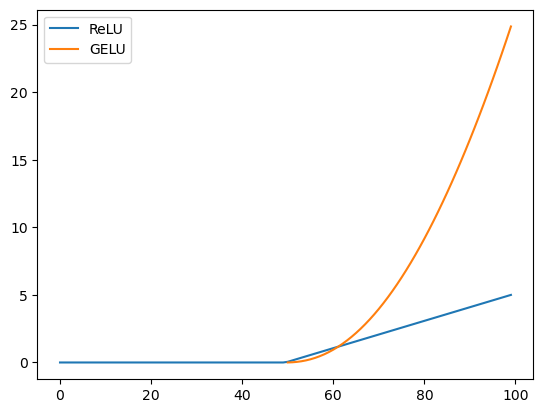

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def relu(x):
    return np.maximum(0, x)

def gelu(x):
    return x * phi(x)

def phi(x):
    return x / 2 * (1 + np.tanh(np.sqrt( (2 / np.pi) * (x + 0.044715 * x ** 3) )))

x = np.linspace(-5, 5, 100)
relu_y = relu(x)
gelu_y = gelu(x)

re = sns.lineplot(relu_y, label="ReLU")
ge = sns.lineplot(gelu_y, label="GELU")

GELU は単純な活性関数のため、出力は $\mathbb{R}^{N \times 4D}$ である。

#### DropOut1

DropOut1で、確率で無効にするパラメータを選択する。

出力は $\mathbb{R}^{N \times 4D}$ である。


#### Linear2

2つめの線形層では、1つめの線形層で$4D$にしたのを$D$に戻す。

出力は $\mathbb{R}^{N \times D}$ である。

#### DropOut2

DropOut2で更に、確率で無効にするパラメータを選択する。

出力は $\mathbb{R}^{N \times D}$ である。

### 最終処理

最終処理の全容は次の通り。

![](images/summary/output.png)

入力の行列は$\mathbb{R}^{N \times D}$ のうち、最初の列のみ抽出する。

そもそも、Input Layerでデータを作成したときを思い出すと、パッチを分割して埋め込んだベクトルの先頭に、埋め込みベクトルと同じ大きさのクラストークンを追加した。
ViTではクラストークンのみを使用するため、最初の列だけを利用する。

クラストークン$z_{CLS}$のベクトルは$\mathbb{R}^{D}$である。

#### MLP Head

MLP Headの全容は次の通りである。

![](images/summary/mlphead.png)

MLP Head では、$x_{CLS}$ のベクトルをLayer Normalization で正規化する。
Layer Normalizationはパラメータを正規化するだけのため、$x_{CLS}$の大きさは変わらず $\mathbb{R}^{D}$である。

その後は線形層を適用する。$L$を分類するクラス数とすると、 線形層の重みづけとして $W \in \mathbb{R}^{D \times L}$の行列をかける。
$x_{CLS}$は$\mathbb{R}^{D}$のため、$W$をかけた $x_{CLS} W$ は$\mathbb{R}^L$のベクトルである。

この$x_{CLS}$によって、画像の分類をする。